Consider the following state-space graph . Construct the state space
tree and reach the goal state H using Breadth-First Search, Depth first
search and Depth Limited search starting from the initial state A

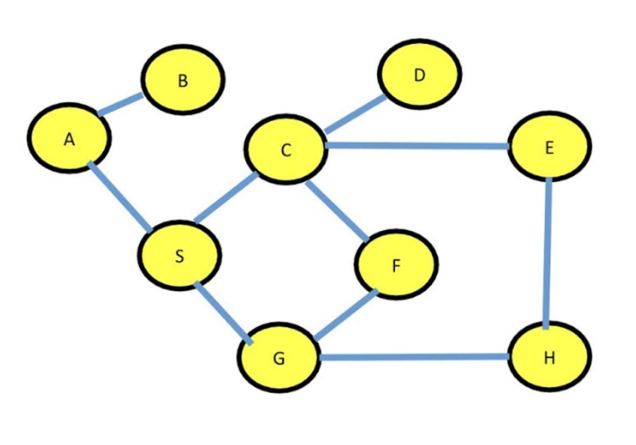

In [24]:
%pip install anytree

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import networkx as nx
from anytree import NodeMixin, RenderTree

In [26]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'S'), ('S', 'C'), ('S', 'G'), ('C', 'F'), ('C', 'D'), ('C', 'E'), ('G', 'F'), ('G', 'H'), ('H', 'E')])

In [27]:
class StateNode(NodeMixin):
    def __init__(self, name, graph=None, parent=None, children=None):
        super(StateNode, self).__init__()
        self.name = name
        self.graph = graph
        self.parent = parent
        if children:
            self.children = children

In [28]:
def bfs(graph, source, goal):
    queue = []
    visited = set()
    root_node = StateNode(source, graph)
    queue.append(root_node)

    while queue:
        current_node = queue.pop(0)
        visited.add(current_node.name)

        for neighbor in current_node.graph.neighbors(current_node.name):
            if neighbor not in visited:
                child_node = StateNode(neighbor, graph=current_node.graph, parent=current_node)
                queue.append(child_node)
                if neighbor == goal:
                    print(RenderTree(root_node).by_attr(lambda node: node.name))
                    print("Goal reached!")
                    return

    print("Goal not reached")

In [29]:
def dfs(graph, source, goal):
    stack = []
    visited = set()
    root_node = StateNode(source, graph)
    stack.append(root_node)

    while stack:
        current_node = stack.pop()
        visited.add(current_node.name)

        for neighbor in current_node.graph.neighbors(current_node.name):
            if neighbor not in visited:
                child_node = StateNode(neighbor, graph=current_node.graph, parent=current_node)
                stack.append(child_node)
                if neighbor == goal:
                    print(RenderTree(root_node).by_attr(lambda node: node.name))
                    print("Goal reached!")
                    return

    print("Goal not reached")

In [30]:
def dls(graph, source, goal, depth_limit):
    stack = []
    visited = set()
    root_node = StateNode(source, graph)
    stack.append((root_node, 0))

    while stack:
        current_node, depth = stack.pop()
        visited.add(current_node.name)

        if depth <= depth_limit:
            for neighbor in current_node.graph.neighbors(current_node.name):
                if neighbor not in visited:
                    child_node = StateNode(neighbor, graph=current_node.graph, parent=current_node)
                    stack.append((child_node, depth + 1))
                    if neighbor == goal:
                        print(RenderTree(root_node).by_attr(lambda node: node.name))
                        print("Goal reached!")
                        return

    print("Goal not reached within the depth limit")

In [31]:
print("BFS:\n")
bfs(G, 'A', 'H')
print("\n\nDFS:\n")
dfs(G, 'A', 'H')
depth_limit = 5
print("\n\nDLS:\n")
dls(G, 'A', 'H', depth_limit)

BFS:

A
├── B
└── S
    ├── C
    │   ├── F
    │   ├── D
    │   └── E
    └── G
        ├── F
        └── H
Goal reached!


DFS:

A
├── B
└── S
    ├── C
    └── G
        ├── F
        └── H
Goal reached!


DLS:

A
├── B
└── S
    ├── C
    └── G
        ├── F
        └── H
Goal reached!


In [32]:
A = StateNode("A")
S = StateNode("S", parent=A)
B = StateNode("B", parent=A)
C = StateNode("C", parent=S)
G = StateNode("G", parent=S)
D = StateNode("D", parent=C)
E = StateNode("E", parent=C)
F = StateNode("F", parent=C)
F1 = StateNode("F", parent=G)
H = StateNode("H", parent=G)
H1 = StateNode("H", parent=E)
G1 = StateNode("G", parent=F)
C1 = StateNode("C", parent=F1)
E1 = StateNode("E", parent=H)
G2 = StateNode("G", parent=H1)
H2 = StateNode("H", parent=G1)
D1 = StateNode("D", parent=C1)
E2 = StateNode("E", parent=C1)
C2 = StateNode("C", parent=E1)
F2 = StateNode("F", parent=G2)
E3 = StateNode("E", parent=H2)
H3 = StateNode("H", parent=E2)
D2 = StateNode("D", parent=C2)
F3 = StateNode("F", parent=C2)


print("State Space Tree:")
for pre, fill, node in RenderTree(A):
    print(f"{pre}{node.name}")

State Space Tree:
A
├── S
│   ├── C
│   │   ├── D
│   │   ├── E
│   │   │   └── H
│   │   │       └── G
│   │   │           └── F
│   │   └── F
│   │       └── G
│   │           └── H
│   │               └── E
│   └── G
│       ├── F
│       │   └── C
│       │       ├── D
│       │       └── E
│       │           └── H
│       └── H
│           └── E
│               └── C
│                   ├── D
│                   └── F
└── B
